# Simple Blobs

https://playground.tensorflow.org/#activation=sigmoid&batchSize=8&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.55448&showTestData=false&discretize=false&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [2]:
from sklearn.datasets import make_blobs

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Helper Function

In [4]:
def plot_data(pl, X,y):
    #plot classes where y==0
    plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
    #plot classes where y==1
    plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
    plt.legend(['0','1'])
    return pl

In [12]:
def plot_decision_boundries(model,X,y):
    amin,bmin=X.min(axis=0)-0.1
    amax,bmax=X.max(axis=0)+0.1
    htics=np.linspace(amin,amax,101)
    vtics=np.linspace(bmin,amax,101)
    
    aa,bb=np.meshgrid(htics,vtics)
    ab=np.c_[aa.ravel(),bb.ravel()]
    
    #make a prediction with the model and reshape the output so controuf plot it
    c=model.predict(ab)
    Z=c.reshape(aa.shape)
    
    plt.figure(figsize=(12,8))
    #plot contour
    plt.contourf(aa,bb,Z,cmap='bwr',alpha=0.2)
    plot_data(plt,X,y)
    return plt

In [13]:
X,y=make_blobs(n_samples=1000,centers=2,random_state=0)

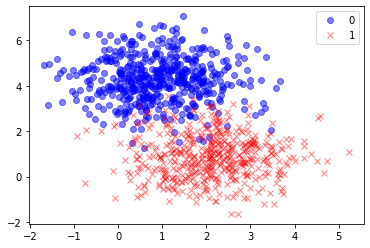

In [14]:
pl=plot_data(plt,X,y)
plt.show()

In [15]:
#split the data into trainning and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
#!pip install keras

In [18]:
#!pip install tensorflow --user

In [19]:
from tensorflow import keras 

In [20]:
#Create a keras model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

"""
1.Create a model
2.Add layers
3.Compile Model
4.Train Model
5.Evaluate Performance
"""

'\n1.Create a model\n2.Add layers\n3.Compile Model\n4.Train Model\n5.Evaluate Performance\n'

<b>Sequential</b>
    is the easiest way to build a model in Keras. It allows you to build a model layer by layer. We use the 'add()' function to add layers to our model.

In [21]:
#simple sequential model
model=Sequential()
#add a Dense fully conected layer
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
#compile the model
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=200,verbose=0)
#evaluate the model
eval_result=model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 11ms/step - loss: 0.1296 - accuracy: 0.9533


In [22]:
print("\n\nTest loss:",eval_result[0],"Test Accuracy:",eval_result[1])



Test loss: 0.1295737624168396 Test Accuracy: 0.95333331823349


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


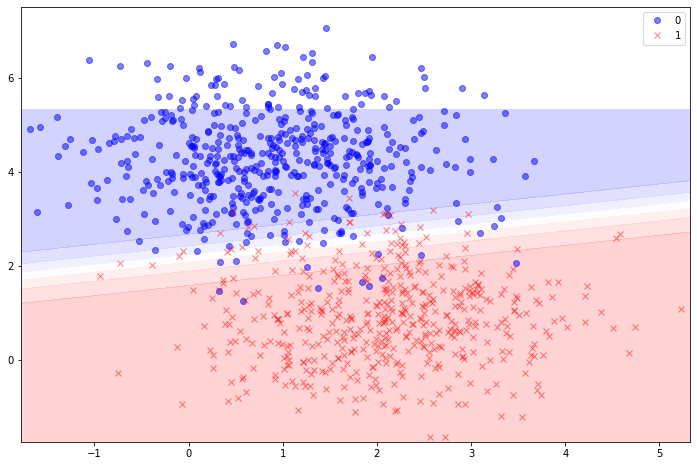

In [24]:
#plot the decision boundries
plot_decision_boundries(model,X,y).show()

https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

In [25]:
import pandas as pd
x=np.array([[2,2,3,4,4,4,4],
   [2,2,3,4,4,4,4],
   [2,2,3,4,4,4,4],
   [2,2,3,4,4,4,4],
  ])

In [26]:
x[:, 0]

array([2, 2, 2, 2])

In [27]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [28]:
print(x_min)
print(x_max)
print(y_min)
print(y_max)

-2.682902159450246
6.226242294723058
-2.643575147750288
8.063142441469973


In [29]:
X[y==0,0],X[y==0,1]

(array([ 0.4666179 ,  2.84382807,  0.61121486,  0.98850206,  0.91464368,
         0.87781755,  0.89033931, -0.969433  , -0.07228289,  1.42446536,
        -0.35594158,  1.2934307 ,  0.34818252,  0.15877698,  0.23151526,
         0.8433895 ,  1.16019557,  0.37895401,  0.98489798,  1.73166577,
        -0.30341909,  0.77787118,  0.57682105,  0.25666569,  0.5126741 ,
         0.1631238 ,  2.10486414, -0.96000973,  1.84523357,  1.21585284,
         1.90811845,  1.49954674,  1.14019865,  0.2982443 ,  1.20011364,
         1.27300325,  2.47034915, -1.68290216,  1.30684683,  0.84256852,
         0.34194798,  0.53534745,  2.01067997,  2.71514276,  1.61958454,
        -0.46867012,  3.13950603,  1.0068719 ,  1.69937057,  1.74806063,
         0.70826671,  0.23670708, -1.27929415,  1.83310069, -0.09448254,
        -0.07835839, -0.97553402,  0.55160678,  1.6164016 , -0.84798658,
         1.74293326,  0.54111653,  1.27450825,  1.25078644,  0.84521607,
         1.0220286 ,  2.37761491,  1.91301254, -0.7